In [1]:
import numpy as np
import cv2
import os
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
cat_folder = 'C:\\Users\Selva\\Desktop\\skillcraft\\test_set\\cats'
dog_folder = 'C:\\Users\\Selva\\Desktop\\skillcraft\\test_set\\dogs'

In [22]:
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (150, 150)) 
    return image.flatten()

In [23]:
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder, filename)
            images.append(preprocess_image(image_path))
            labels.append(0 if 'cat' in folder else 1)
    return images, labels


In [24]:
cat_images, cat_labels = load_images(cat_folder)

In [25]:
dog_images, dog_labels = load_images(dog_folder)

In [26]:
X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

In [28]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)

In [29]:
clf = svm.SVC(kernel='linear', probability=True)


In [30]:
clf.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [71]:

y_pred = clf.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:

print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.51      0.55      0.53       209
         dog       0.48      0.45      0.46       196

    accuracy                           0.50       405
   macro avg       0.50      0.50      0.50       405
weighted avg       0.50      0.50      0.50       405



In [35]:
from skimage.transform import resize 
from skimage.io import imread
import matplotlib.pyplot as plt 


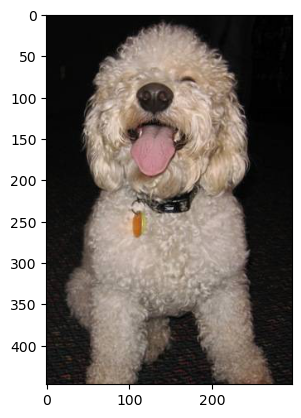

In [36]:
path='C:\\Users\\Selva\\Desktop\\skillcraft\\test_set\\dogs\\dog.4003.jpg'
img= imread(path) 
plt.imshow(img) 
plt.show() 


In [37]:
from sklearn.model_selection import GridSearchCV 

In [51]:
img_resize = resize(img, (150, 150, 3))  # Use 150x150 size for prediction
l = [img_resize.flatten()]

In [57]:
# Predict probabilities
# Predict probabilities
probability = clf.predict_proba(X)

Categories = ['Cat', 'Dog']

In [58]:

for ind, val in enumerate(Categories):
    print(f'{val} = {probability[0][ind] * 100:.2f}%')

Cat = 52.80%
Dog = 47.20%


In [74]:
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.49876543209876545


In [72]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 49.88%
